In [1]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_diabetes
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from graphviz import render

In [2]:
# Importando o arquivo do dataset, gerando um DataFrame
full_data = pd.read_csv('modelo_ajustado1.csv')
full_data.shape

(395, 33)

In [3]:
X = full_data.drop('G3', axis=1)
y = full_data['G3']

In [4]:
print(X.shape)
print(y.shape)

(395, 32)
(395,)


In [5]:
regr_1 = DecisionTreeRegressor()
regr_1.fit(X, y)

DecisionTreeRegressor()

In [6]:
y_pred = regr_1.predict(X)

In [7]:
y_pred

array([ 6.,  6., 10., 15., 10., 15., 11.,  6., 19., 15.,  9., 12., 14.,
       11., 16., 14., 14., 10.,  5., 10., 15., 15., 16., 12.,  8.,  8.,
       11., 15., 11., 11., 12., 17., 16., 12., 15.,  6., 18., 15., 11.,
       13., 11., 12., 18., 11.,  9.,  6., 11., 20., 14.,  7., 13., 13.,
       10., 11., 13., 10., 15., 15.,  9., 16., 11., 11.,  9.,  9., 10.,
       15., 12.,  6.,  8., 16., 15., 10.,  5., 14., 11., 10., 10., 11.,
       10.,  5., 12., 11.,  6., 15., 10.,  8.,  6., 14., 10.,  7.,  8.,
       18.,  6., 10., 14., 10., 15., 10., 14.,  8.,  5., 17., 14.,  6.,
       18., 11.,  8., 18., 13., 16., 19., 10., 13., 19.,  9., 16., 14.,
       13.,  8., 13., 15., 15., 13., 13.,  8., 12., 11.,  9.,  0., 18.,
        0.,  0., 12., 11.,  0.,  0.,  0.,  0., 12., 15.,  0.,  9., 11.,
       13.,  0., 11.,  0., 11.,  0., 10.,  0., 14., 10.,  0., 12.,  8.,
       13., 10., 15., 12.,  0.,  7.,  0., 10.,  7., 12., 10., 16.,  0.,
       14.,  0., 16., 10.,  0.,  9.,  9., 11.,  6.,  9., 11.,  8

In [8]:
from sklearn.metrics import r2_score
print(r2_score(y, regr_1.predict(X)))

1.0


In [9]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y, y_pred)

0.0

In [10]:
regr_1 = DecisionTreeRegressor(max_depth=4)
regr_1.fit(X, y)

DecisionTreeRegressor(max_depth=4)

In [11]:
y_pred = regr_1.predict(X)

In [12]:
mean_absolute_error(y, y_pred)

0.8844389978576451

# Treinamento e Teste

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=32)

In [14]:
print('Treino e teste (X variáveis e y resposta):'
      '\n>> Treino X {trainX}\n>> Treino y {trainY}'
      '\n>> Teste X {testX}\n>> Teste y {testY}'.format(trainX=X_train.shape,
                                                        trainY=y_train.shape,
                                                        testX=X_test.shape, 
                                                        testY=y_test.shape))

Treino e teste (X variáveis e y resposta):
>> Treino X (316, 32)
>> Treino y (316,)
>> Teste X (79, 32)
>> Teste y (79,)


In [15]:
regr_1 = DecisionTreeRegressor(max_depth=4)
regr_1.fit(X_train, y_train)

y_pred = regr_1.predict(X_test)

In [16]:
mean_absolute_error(y_test, y_pred)

0.9443235082860161

In [17]:
from sklearn.tree import export_graphviz
export_graphviz(regr_1, out_file='tree.dot')

render('dot', 'png', 'tree.dot')

'tree.dot.png'

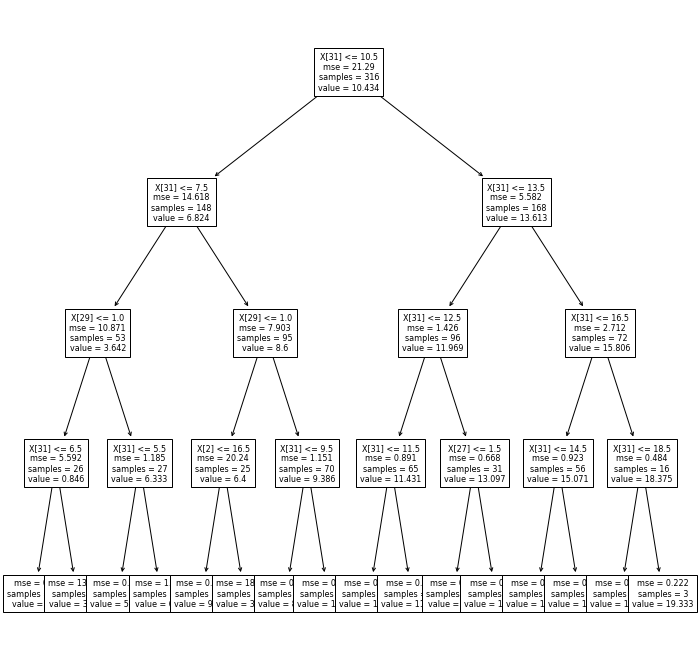

In [18]:
from sklearn import tree

# plotando árvore
plt.figure(figsize=(12,12))
tree.plot_tree(regr_1, fontsize=8)
plt.show()

In [19]:
X

,escola,sexo,idade,tipo_moradia,tamanho_familia,stat_casamento_pais,edu_mae,edu_pai,trabalho_mae,trabalho_pai,...,relacionamento,relacao_familia,tempo_livre,sair_amigos,consumo_alcool_semana,consumo_alcool_fds,saude_atual,faltas,G1,G2
0,0,0,18,1,0,0,4,4,0,4,...,0,4,3,4,1,1,3,6,5,6
1,0,0,17,1,0,1,1,1,0,2,...,0,5,3,3,1,1,3,4,5,5
2,0,0,15,1,1,1,1,1,0,2,...,0,4,3,2,2,3,3,10,7,8
3,0,0,15,1,0,1,4,2,1,3,...,1,3,2,2,1,1,5,2,15,14
4,0,0,16,1,0,1,3,3,2,2,...,0,4,3,2,1,2,5,4,6,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,1,1,0,2,2,3,3,...,0,5,5,4,4,5,4,11,9,9
391,1,1,17,1,1,1,3,1,3,3,...,0,2,4,5,3,4,2,3,14,16
392,1,1,21,0,0,1,1,1,2,2,...,0,5,5,3,3,3,3,3,10,8
393,1,1,18,0,1,1,3,2,3,2,...,0,4,4,1,3,4,5,0,11,12


# Importância das variáveis

In [20]:
from matplotlib import pyplot

In [21]:
importance = regr_1.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.03904
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00118
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.09087
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.86892


In [22]:
importance

array([0.        , 0.        , 0.03903726, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.0011782 , 0.        , 0.09086736,
       0.        , 0.86891718])

In [23]:
features_n = X.columns

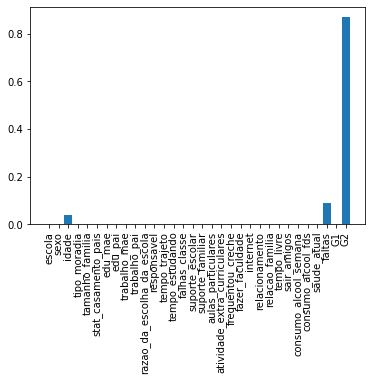

In [24]:
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.xticks([x for x in range(len(importance))], features_n, rotation='vertical')
pyplot.show()

# Análise dos Resultados